In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum05/"

In [3]:
# 1. Import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# 2B. Memuat dari sklearn
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(
    data = iris.data,
    columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# 4.1 Missing values
df.isnull().sum()

# 4.2 Duplikat
df.duplicated().sum()
df = df.drop_duplicates()

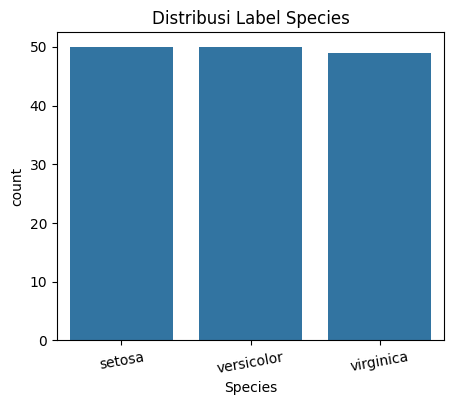

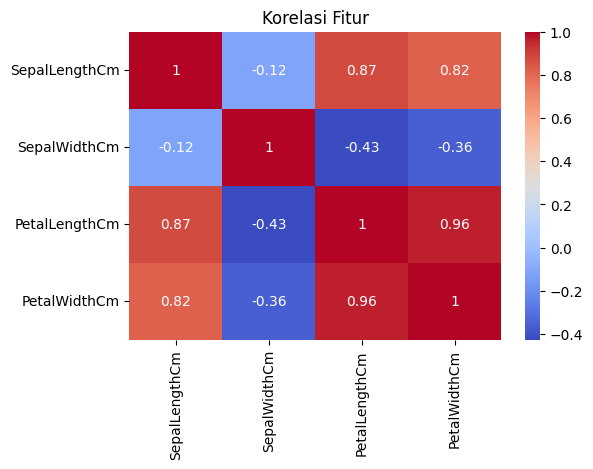

In [12]:
# 5.1 Distribusi label
plt.figure(figsize=(5,4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi Label Species')
plt.xticks(rotation=10)
plt.show()

# 5.2 Korelasi fitur numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [13]:
# 6.1 Pilih fitur dan target
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_cols]
y = df['Species'].astype('category')                  # pastikan kategori
class_names = list(y.cat.categories)                  # urutan kelas asli (setosa, versicolor, virginica)
y_codes = y.cat.codes                                 # numerik 0/1/2 untuk training

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_codes, test_size=0.2, random_state=42, stratify=y_codes
)

len(X_train), len(X_test)

(119, 30)

In [15]:
dt = DecisionTreeClassifier(
    criterion='gini',   # atau 'entropy'
    max_depth=4,        # bisa dituning nanti
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=class_names))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



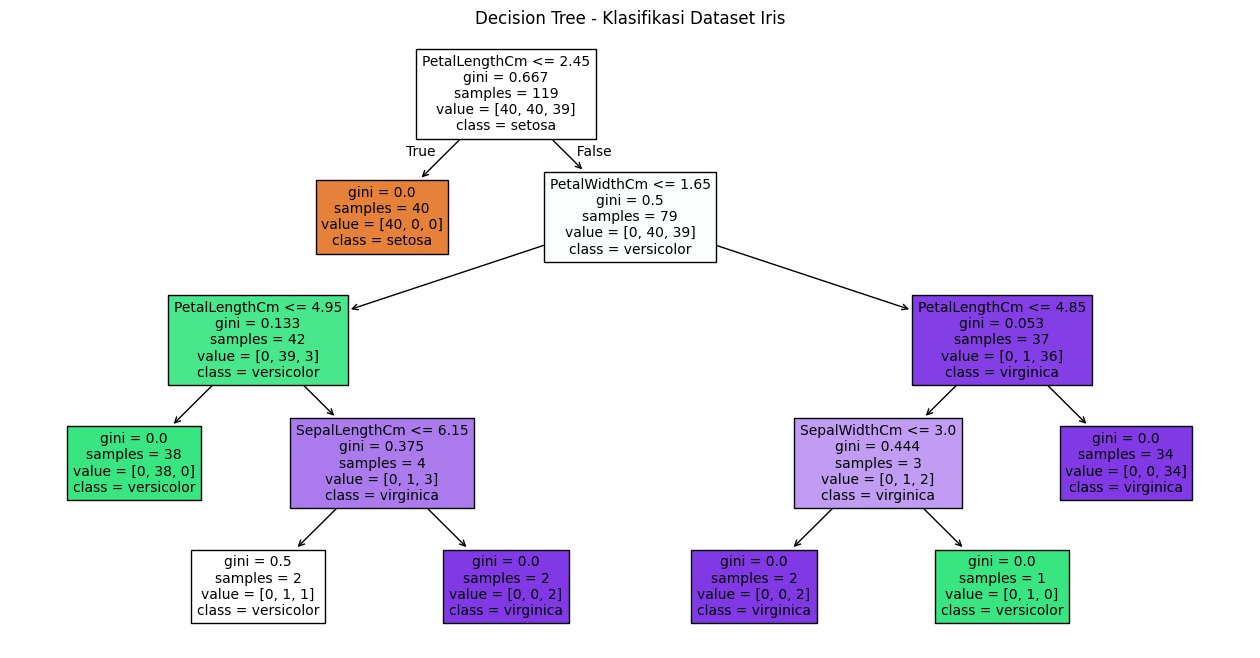

In [17]:
plt.figure(figsize=(16,8))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=class_names,
    filled=True,
    fontsize=10
)
plt.title("Decision Tree - Klasifikasi Dataset Iris")
plt.show()

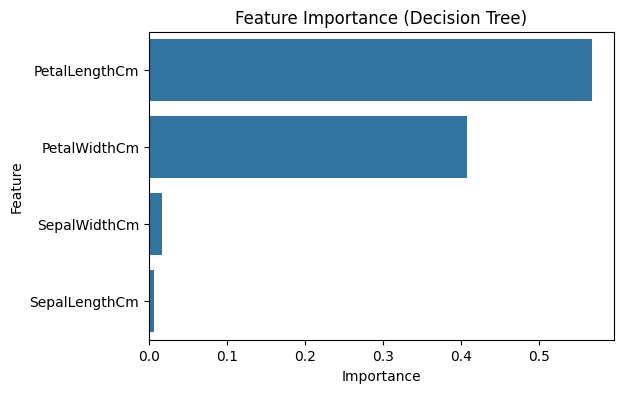

,0
PetalLengthCm,0.568357
PetalWidthCm,0.408237
SepalWidthCm,0.017022
SepalLengthCm,0.006383


In [18]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

imp

In [19]:
scores = {}
for d in range(2, 10):   # coba 2..9
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")
scores

Best max_depth: 3 | Acc: 96.67 %


{2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9333333333333333,
 5: 0.9333333333333333,
 6: 0.9333333333333333,
 7: 0.9333333333333333,
 8: 0.9333333333333333,
 9: 0.9333333333333333}

In [25]:
import os
import joblib

# Pastikan folder model sudah ada
os.makedirs("/content/gdrive/MyDrive/MachineLearning/praktikum05/model", exist_ok=True)

# Tentukan path file model
model_path = "/content/gdrive/MyDrive/MachineLearning/praktikum05/model/model_iris_dt.pkl"

# Simpan model Decision Tree
joblib.dump(dt, model_path)

print("Model berhasil disimpan di:", model_path)

Model berhasil disimpan di: /content/gdrive/MyDrive/MachineLearning/praktikum05/model/model_iris_dt.pkl
